a) rj - rf = alphaj + Betaj(rm - rf) + ej is simple regression model because
it can be broken down into the components of y = XB + e. The dependent variable rj -rf is the same as y. The independent variable (rm - rf) is the same as X. Alpha j is the intercept term. Bj is the slope which is B in the simple regression model. ej is the error term which is the same as e in the model.

b)

In [ ]:
#Part b
##Import necessary packages
import numpy as np  # Useful for math calculations
import pandas as pd  # Useful for data manipulation
import statsmodels.api as sm  # Useful for regression analysis
import statsmodels.formula.api as smf  # Required for regression using formulas
import matplotlib.pyplot as plt  # Useful for plotting

#Load Data
capm5_df = pd.read_csv("/content/capm5.csv")
capm5_df.head()
print(capm5_df.head())

#Account For rj - rf = alpha. + Beta(rm - rf) +ej

#excess return columns
capm5_df["mkt_excess"] = capm5_df["mkt"] - capm5_df["riskfree"]

#Firms
firms = ["ge", "ibm", "ford", "msft", "dis", "xom"]

# Estimate CAPM model (with intercept) for each firm
results_with_intercept = {}
for firm in firms:
    capm5_df[f"{firm}_excess"] = capm5_df[firm] - capm5_df["riskfree"]
    formula = f"{firm}_excess ~ mkt_excess"
    exercise_2_16 = smf.ols(formula=formula, data=capm5_df).fit()
    results_with_intercept[firm] = {
        "alpha": exercise_2_16.params["Intercept"],
        "beta": exercise_2_16.params["mkt_excess"],
        "R_squared": exercise_2_16.rsquared
    }
# Convert to DataFrame
results_df = pd.DataFrame(results_with_intercept).T
print("\nCAPM Model Results (with Intercept):")
print(results_df)

# Determine most aggressive and defensive
most_aggressive = results_df["beta"].idxmax()
most_defensive = results_df["beta"].idxmin()
print(f"\nMost aggressive firm: {most_aggressive} (beta = {results_df.loc[most_aggressive, 'beta']:.3f})")
print(f"Most defensive firm: {most_defensive} (beta = {results_df.loc[most_defensive, 'beta']:.3f})")

        date  time        ge       ibm      ford      msft       dis  \
0  30JAN1998     1  0.056218 -0.056153  0.058842  0.154255  0.080884   
1  27FEB1998     2  0.003226  0.059620  0.109069  0.136154  0.047368   
2  31MAR1998     3  0.112379 -0.005386  0.145856  0.056047 -0.046343   
3  30APR1998     4 -0.011603  0.115523  0.086181  0.006983  0.168337   
4  29MAY1998     5 -0.021277  0.015922  0.132333 -0.058946 -0.090818   

        xom       mkt  riskfree  
0 -0.030644  0.004502  0.004480  
1  0.081728  0.073303  0.004480  
2  0.060784  0.051301  0.004519  
3  0.080407  0.010903  0.004503  
4 -0.029461 -0.025748  0.004488  

CAPM Model Results (with Intercept):
         alpha      beta  R_squared
ge   -0.000959  1.147952   0.480093
ibm   0.006053  0.976890   0.359005
ford  0.003779  1.662031   0.265998
msft  0.003250  1.201840   0.352267
dis   0.001047  1.011521   0.390912
xom   0.005284  0.456521   0.186136

Most aggressive firm: ford (beta = 1.662)
Most defensive firm: xom (beta

c)


Alpha Estimates (should be close to zero under CAPM theory):
ge: alpha = -0.00096
ibm: alpha = 0.00605
ford: alpha = 0.00378
msft: alpha = 0.00325
dis: alpha = 0.00105
xom: alpha = 0.00528


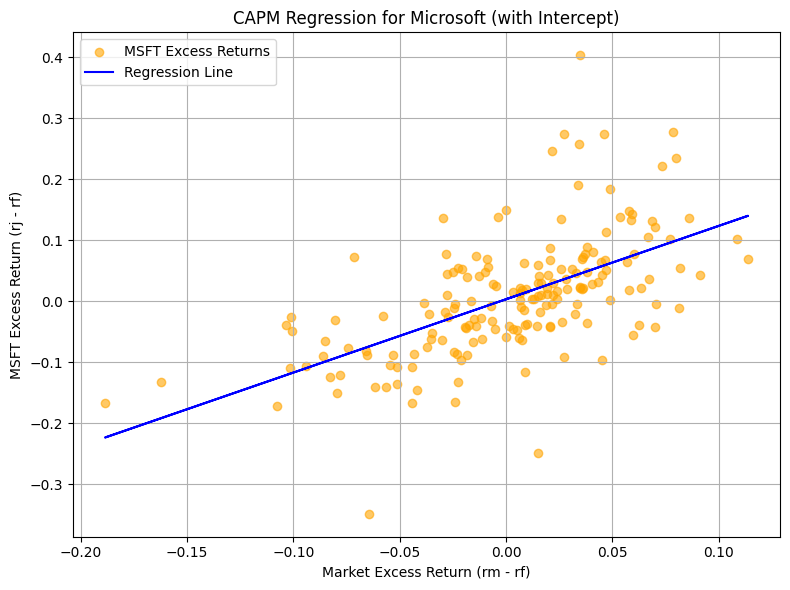

In [ ]:
#Part c
#Check if alphas are close to zero
print("\nAlpha Estimates (should be close to zero under CAPM theory):")
for firm in firms:
    print(f"{firm}: alpha = {results_with_intercept[firm]['alpha']:.5f}")

# Plot regression line and data for Microsoft
plt.figure(figsize=(8, 6))
plt.scatter(capm5_df["mkt_excess"], capm5_df["msft_excess"], alpha=0.6, label="MSFT Excess Returns", color='orange')
# Regression line
msft_model = smf.ols(formula="msft_excess ~ mkt_excess", data=capm5_df).fit()
plt.plot(capm5_df["mkt_excess"], msft_model.fittedvalues, color="blue", label="Regression Line")
plt.title("CAPM Regression for Microsoft (with Intercept)")
plt.xlabel("Market Excess Return (rm - rf)")
plt.ylabel("MSFT Excess Return (rj - rf)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

d)

In [ ]:
#Part d
results_no_intercept = {}

# Estimate CAPM with no intercept for each firm
for firm in firms:
    formula_no_intercept = f"{firm}_excess ~ -1 + mkt_excess"  # "-1" removes intercept
    model_no_intercept = smf.ols(formula=formula_no_intercept, data=capm5_df).fit()
    results_no_intercept[firm] = {
        "beta": model_no_intercept.params["mkt_excess"],
        "R_squared": model_no_intercept.rsquared
    }

# Convert to DataFrame
results_no_intercept_df = pd.DataFrame(results_no_intercept).T
print("\nCAPM Estimates Assuming Alpha = 0:")
print(results_no_intercept_df)

# Optional: Compare beta values side-by-side
comparison_df = pd.DataFrame({
    "beta_with_intercept": [results_with_intercept[firm]["beta"] for firm in firms],
    "beta_no_intercept": [results_no_intercept[firm]["beta"] for firm in firms]
}, index=firms)

print("\nComparison of Beta Estimates:")
print(comparison_df)


CAPM Estimates Assuming Alpha = 0:
          beta  R_squared
ge    1.146763   0.480448
ibm   0.984395   0.361379
ford  1.666717   0.267686
msft  1.205869   0.354284
dis   1.012819   0.392352
xom   0.463073   0.189153

Comparison of Beta Estimates:
      beta_with_intercept  beta_no_intercept
ge               1.147952           1.146763
ibm              0.976890           0.984395
ford             1.662031           1.666717
msft             1.201840           1.205869
dis              1.011521           1.012819
xom              0.456521           0.463073
